In [1]:
import findspark
findspark.init()

In [22]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sweetviz as sv 
import IPython 

In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName('BigdataProject').getOrCreate()

22/12/03 14:29:25 WARN Utils: Your hostname, Vikass-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.0.232 instead (on interface en0)
22/12/03 14:29:25 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/03 14:29:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/12/03 14:29:26 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [5]:
spark

In [12]:
df = spark.read.option('header','true').csv('CIS_Automotive_Kaggle_Sample.csv',inferSchema=True)

In [7]:
df.columns

['vin',
 'stockNum',
 'firstSeen',
 'lastSeen',
 'msrp',
 'askPrice',
 'mileage',
 'isNew',
 'color',
 'interiorColor',
 'brandName',
 'modelName',
 'dealerID',
 'vf_ABS',
 'vf_ActiveSafetySysNote',
 'vf_AdaptiveCruiseControl',
 'vf_AdaptiveDrivingBeam',
 'vf_AdaptiveHeadlights',
 'vf_AdditionalErrorText',
 'vf_AirBagLocCurtain',
 'vf_AirBagLocFront',
 'vf_AirBagLocKnee',
 'vf_AirBagLocSeatCushion',
 'vf_AirBagLocSide',
 'vf_AutoReverseSystem',
 'vf_AutomaticPedestrianAlertingSound',
 'vf_AxleConfiguration',
 'vf_Axles',
 'vf_BasePrice',
 'vf_BatteryA',
 'vf_BatteryA_to',
 'vf_BatteryCells',
 'vf_BatteryInfo',
 'vf_BatteryKWh',
 'vf_BatteryKWh_to',
 'vf_BatteryModules',
 'vf_BatteryPacks',
 'vf_BatteryType',
 'vf_BatteryV',
 'vf_BatteryV_to',
 'vf_BedLengthIN',
 'vf_BedType',
 'vf_BlindSpotMon',
 'vf_BodyCabType',
 'vf_BodyClass',
 'vf_BrakeSystemDesc',
 'vf_BrakeSystemType',
 'vf_BusFloorConfigType',
 'vf_BusLength',
 'vf_BusType',
 'vf_CAN_AACN',
 'vf_CIB',
 'vf_CashForClunkers',
 'v

In [118]:
df_all_interesting = df.select('firstSeen','lastSeen','msrp','askPrice','mileage','modelName','brandName',
                           'vf_BasePrice', 'vf_TopSpeedMPH','vf_ModelYear','vf_WheelSizeFront','vf_WheelSizeRear',
                                'vf_FuelTypePrimary','vf_FuelTypeSecondary','vf_TransmissionStyle', 'vf_Model') 

In [36]:
#only for data exploration
df_all_interesting = df.select('mileage',
                           'vf_BasePrice', 'vf_TopSpeedMPH','vf_ModelYear',
                                'vf_FuelTypePrimary','vf_FuelTypeSecondary','vf_TransmissionStyle', 'vf_Model') 

In [33]:
df_all_interesting.count()

5695015

In [15]:
#after dropping na rows 
df_all_interesting_dropped = df_all_interesting.dropna(how='any')

In [16]:
df_all_interesting_dropped.count()

49416

In [20]:
df_all_interesting_pandas = df_all_interesting_dropped.toPandas()

In [31]:
#The sub-step incorporates a short overview of the dataset. 
#This specifies specific visuals and statistics to swiftly comprehend data and make efficient data-driven decisions.
#using Sweetviz library
analyze_report = sv.analyze([df_all_interesting_pandas,"pyspark data"], 'askPrice')
analyze_report.show_html('analyze.html' , open_browser = False)

                                             |      | [  0%]   00:00 -> (? left)

Report analyze.html was generated.



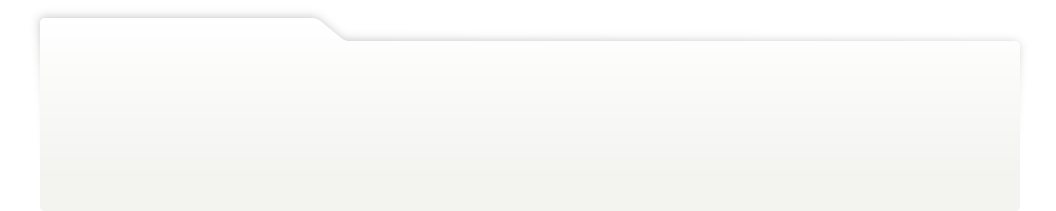
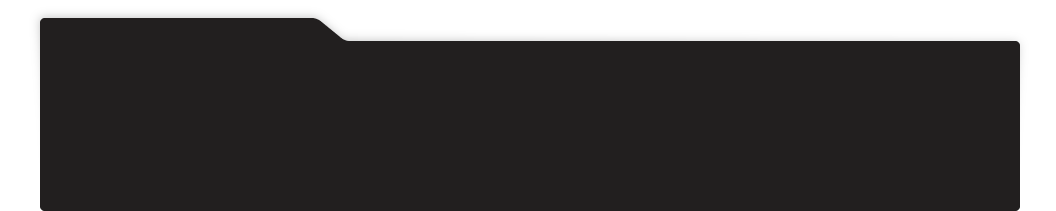
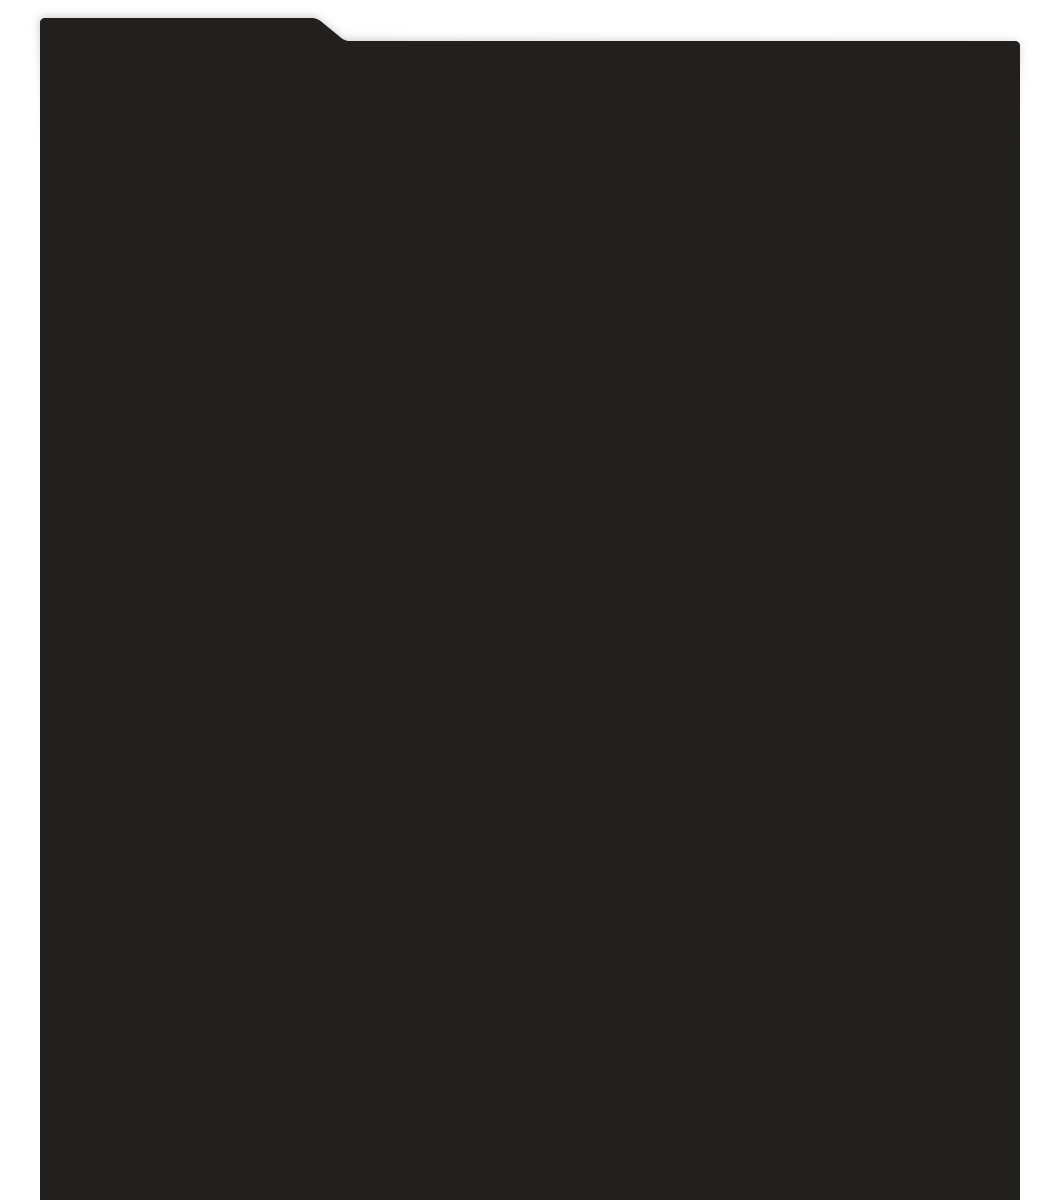
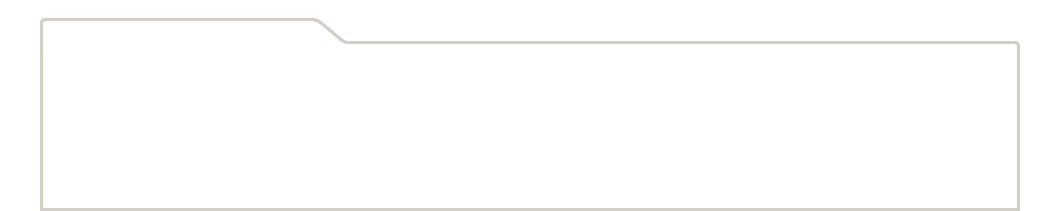
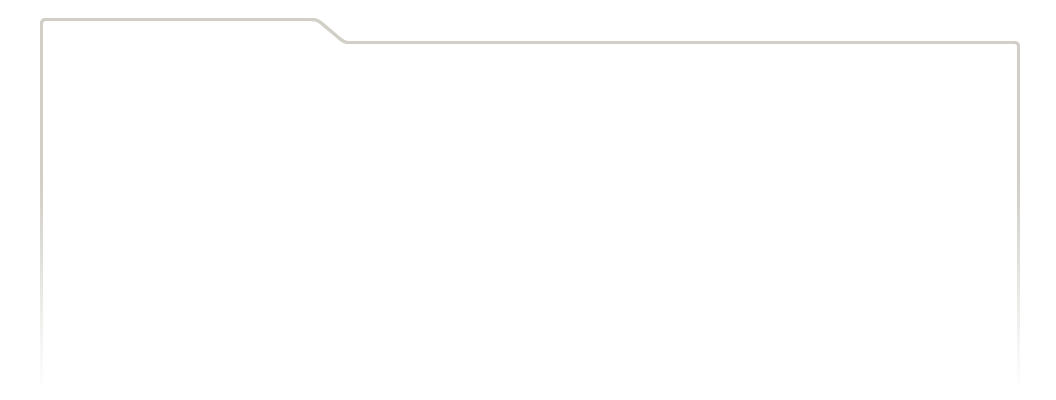
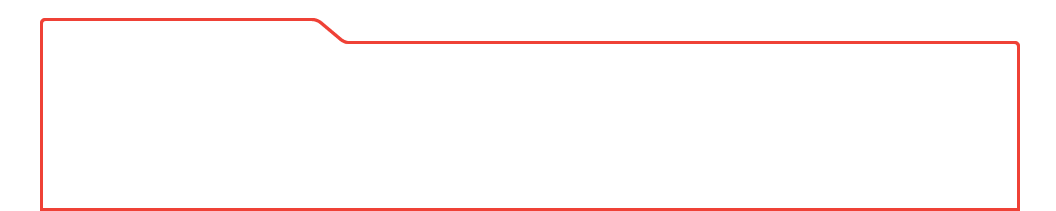
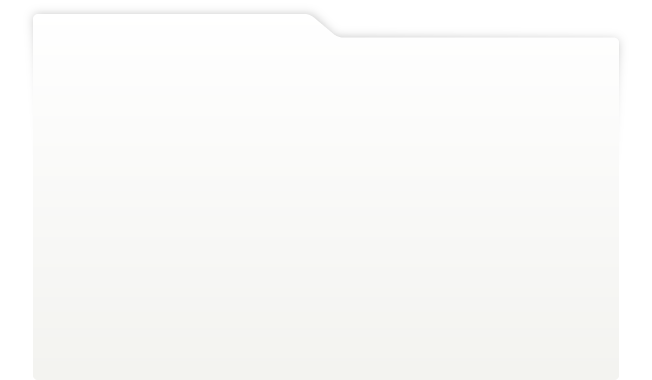
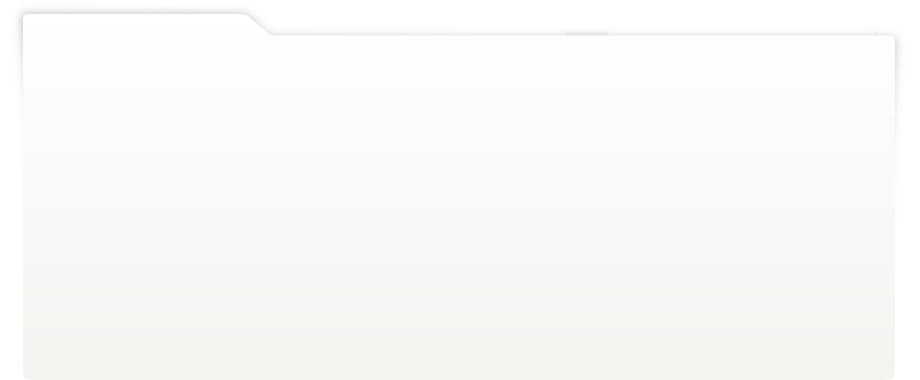
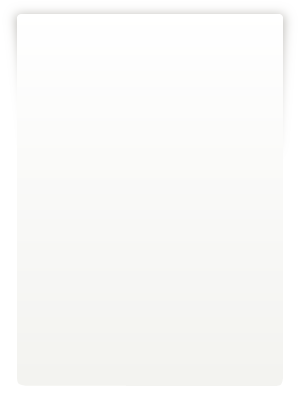
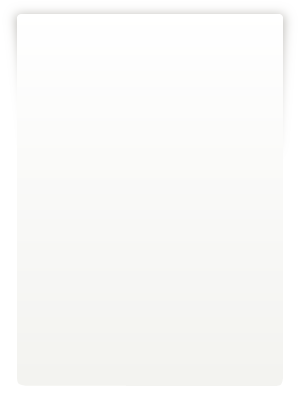
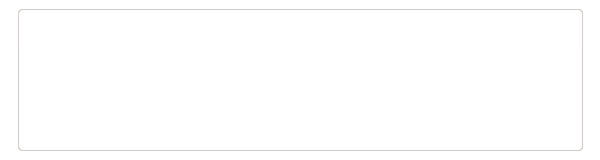
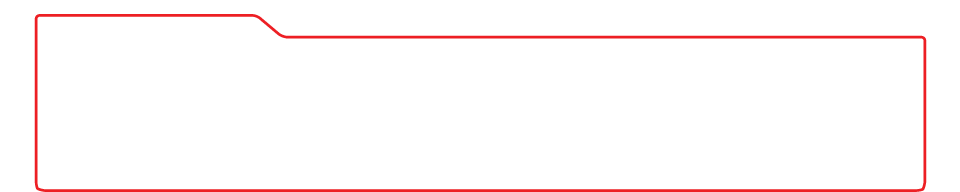
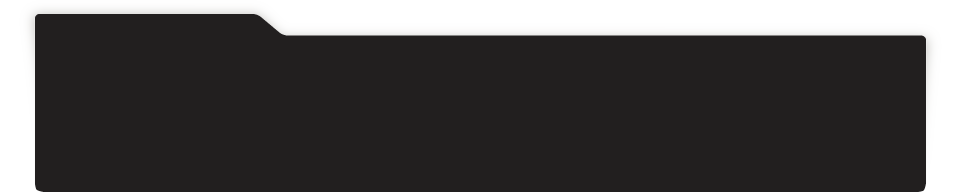
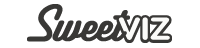
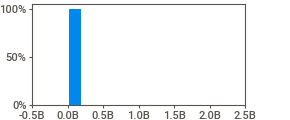
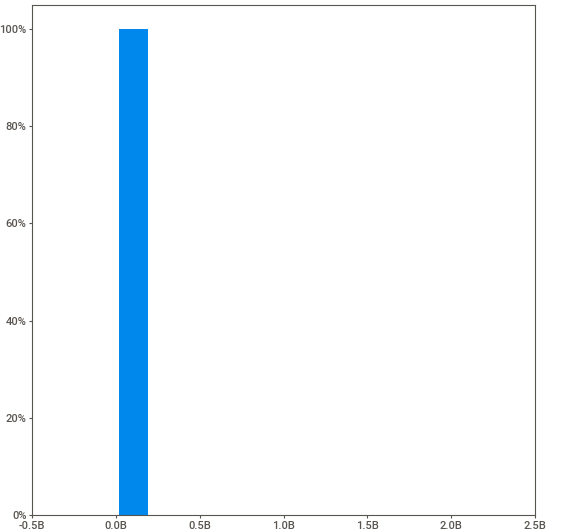
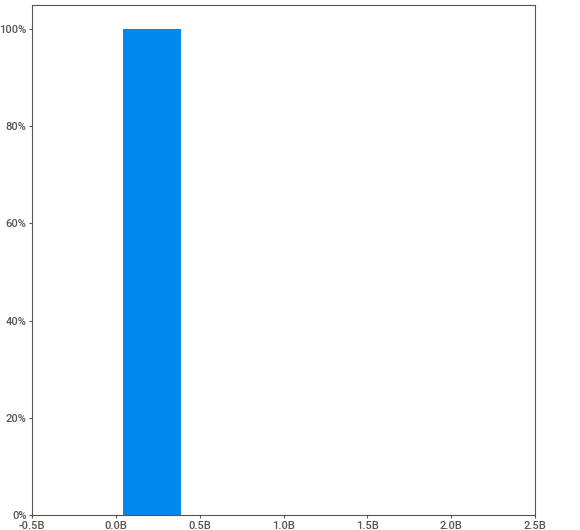
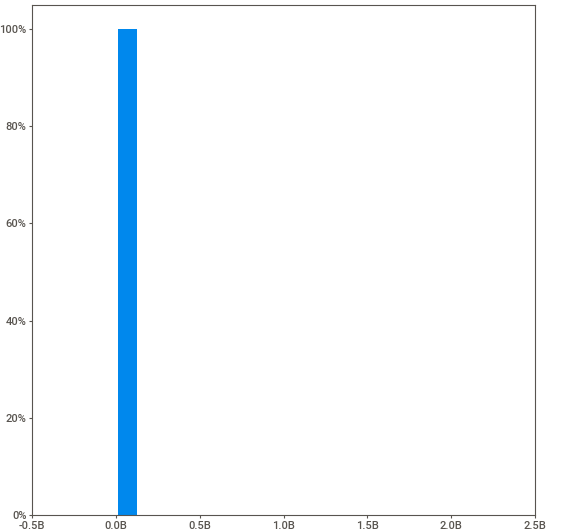
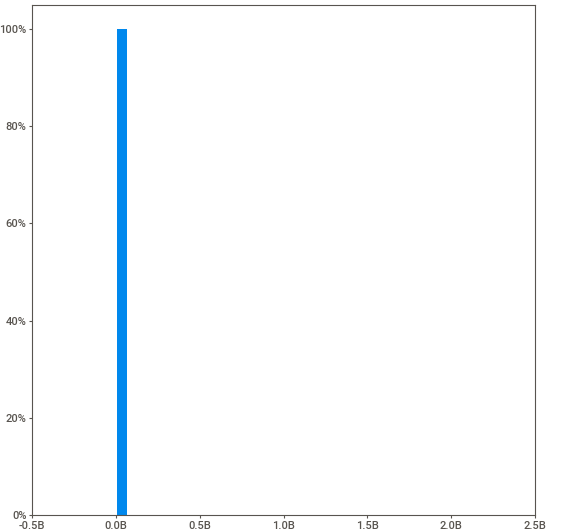
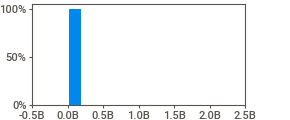
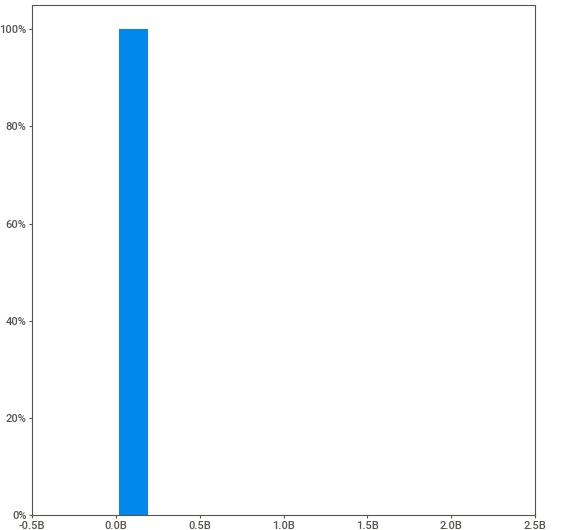
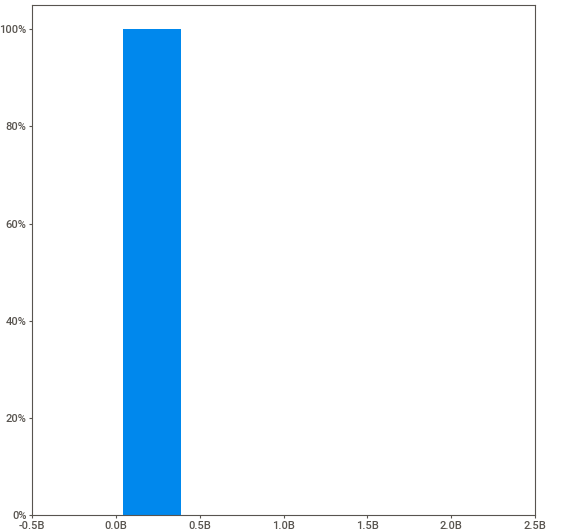
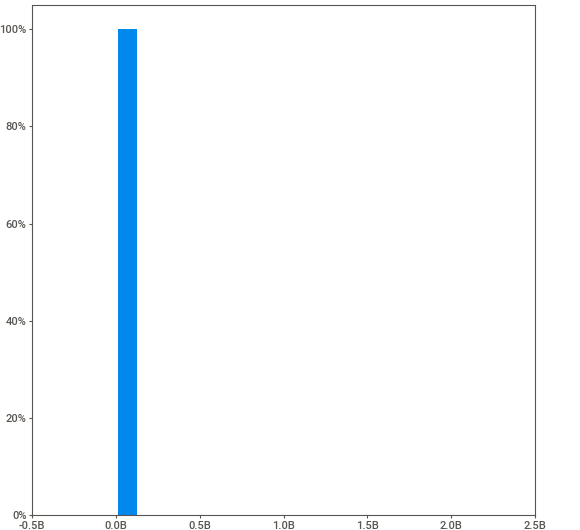
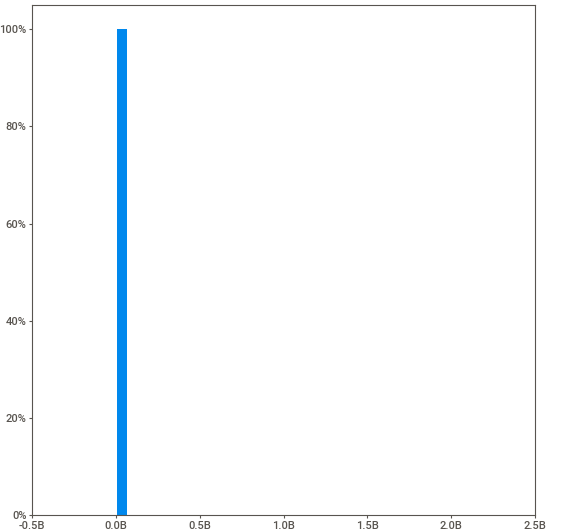
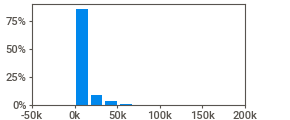
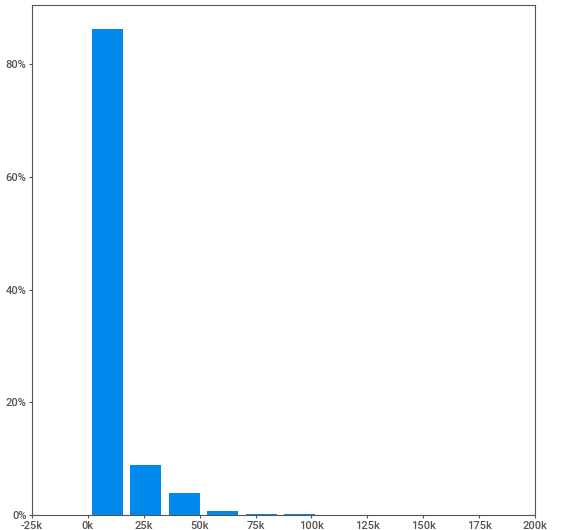
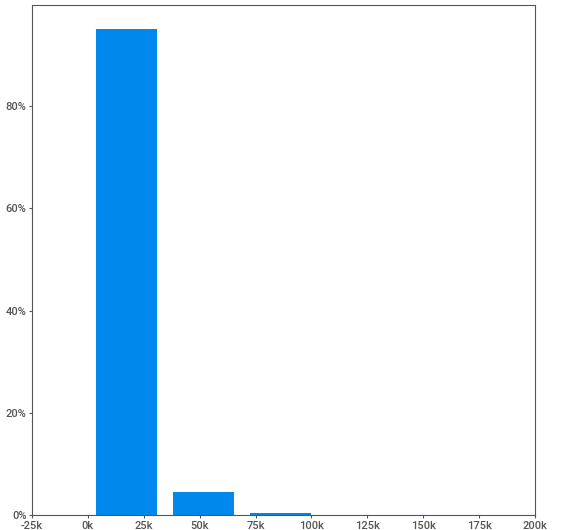
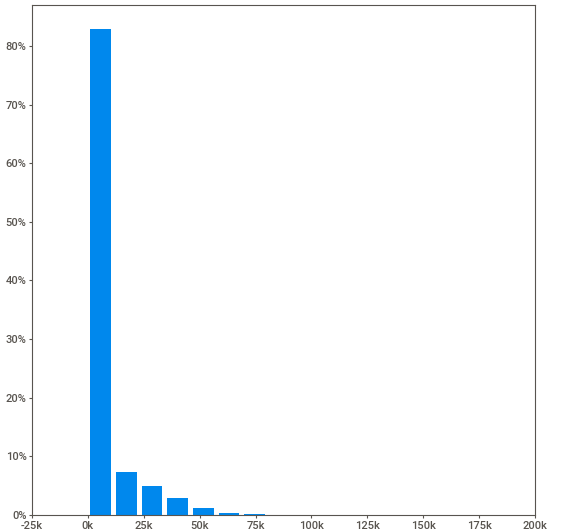
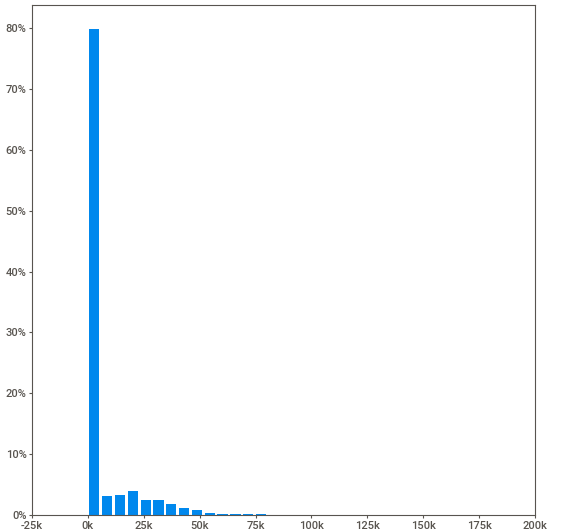
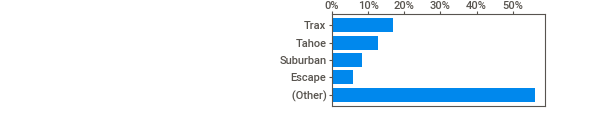
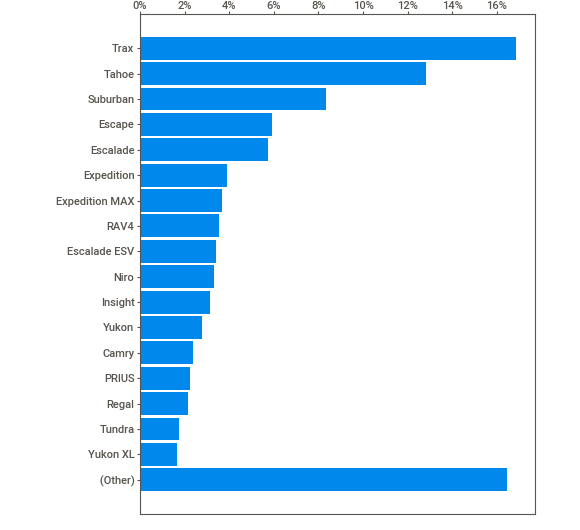
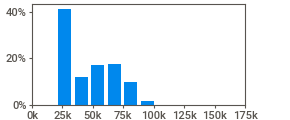
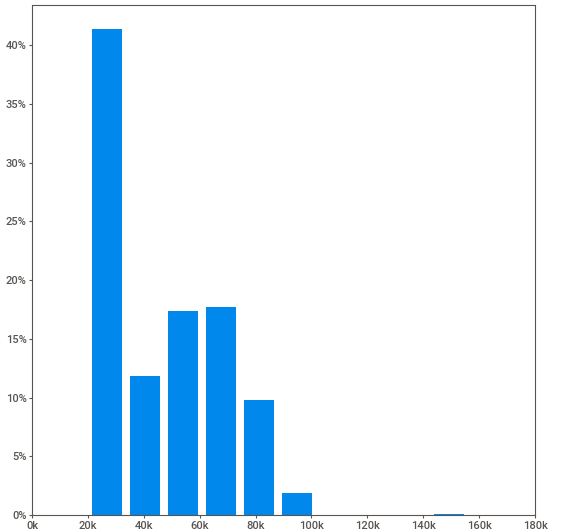
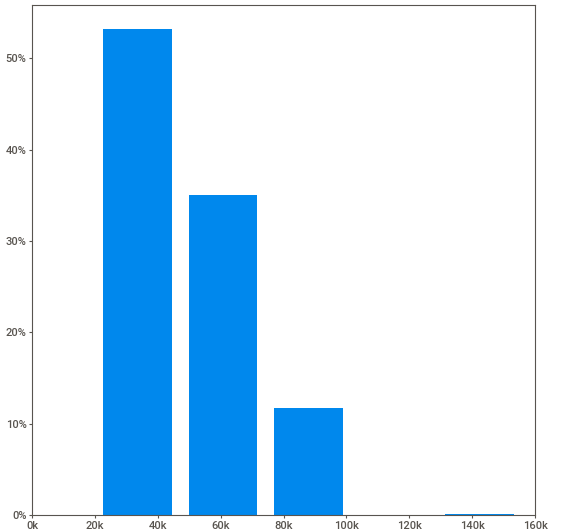
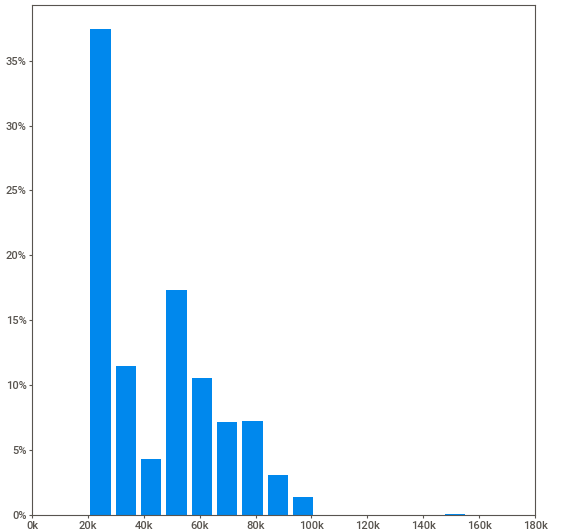
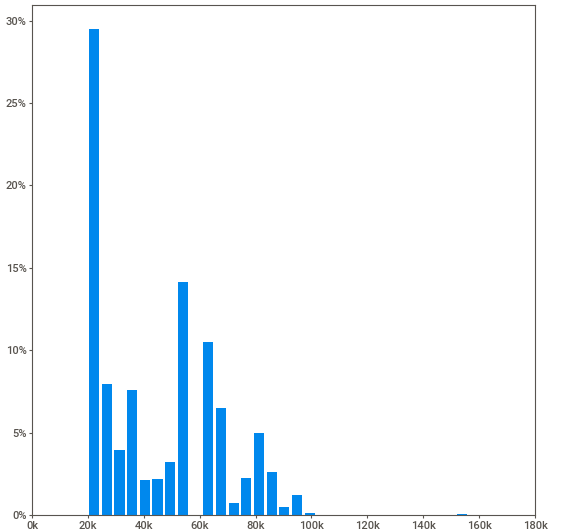
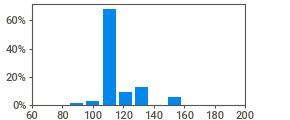
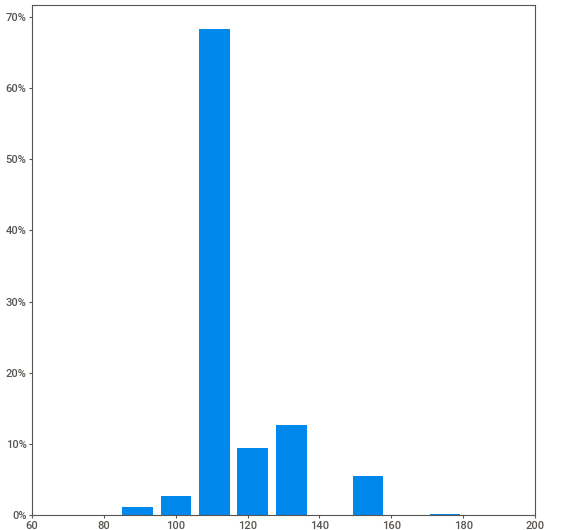
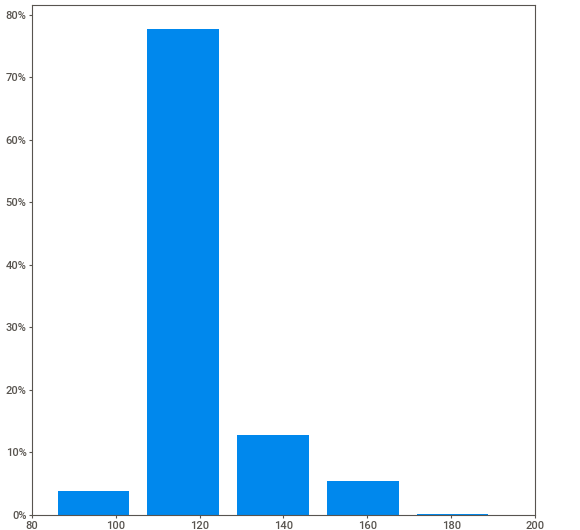
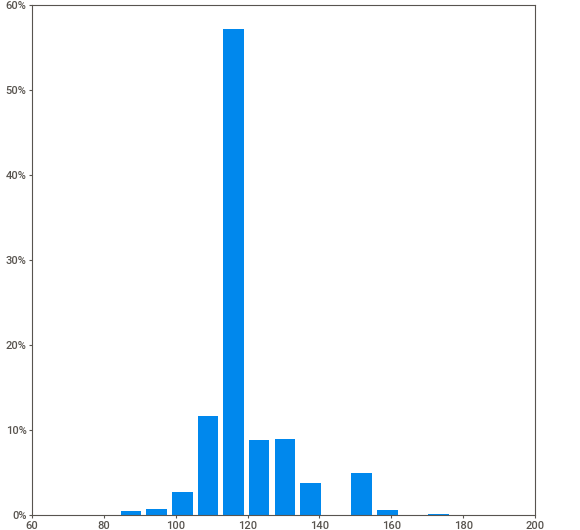
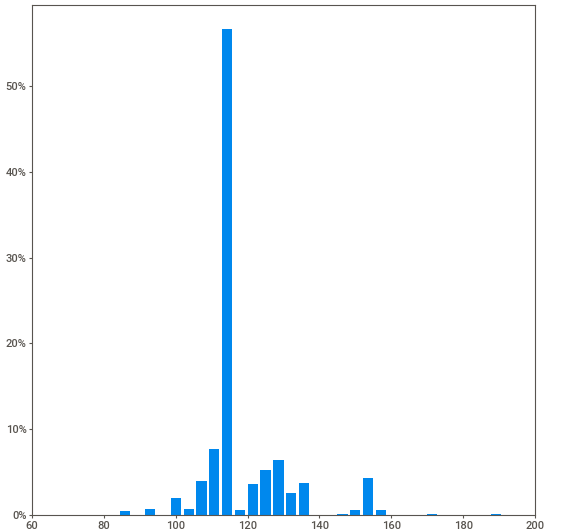
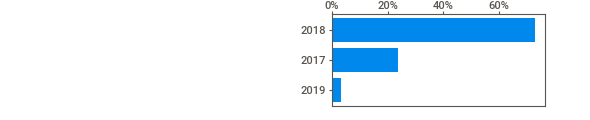
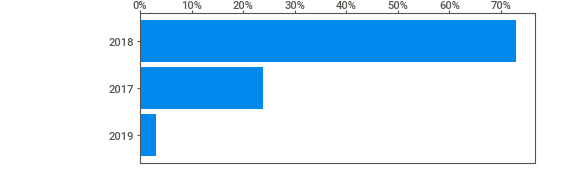
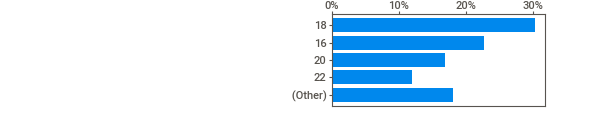
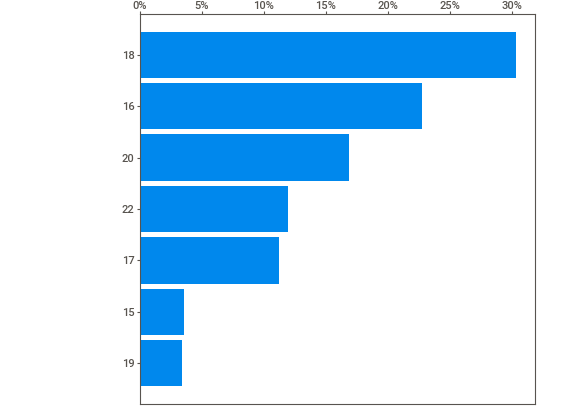
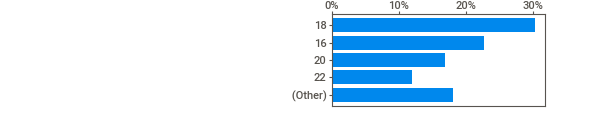
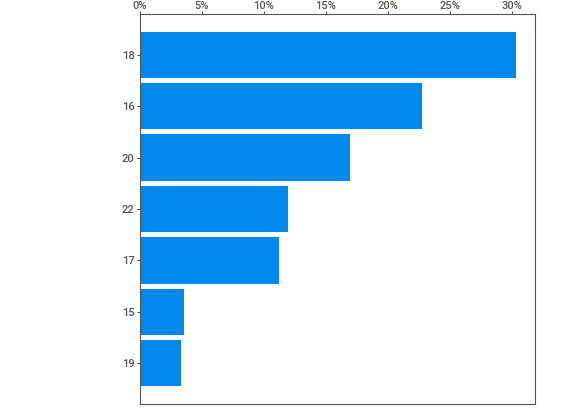
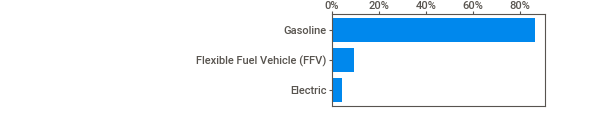
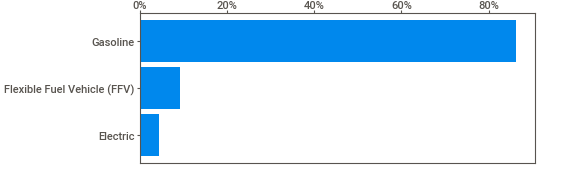
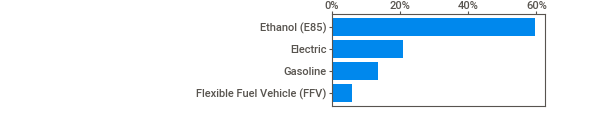
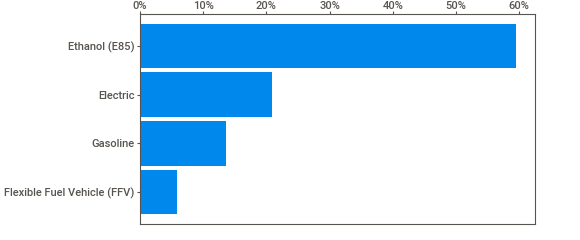
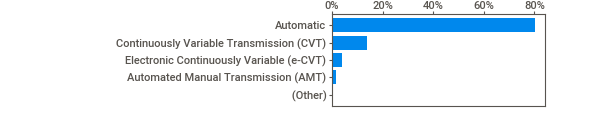
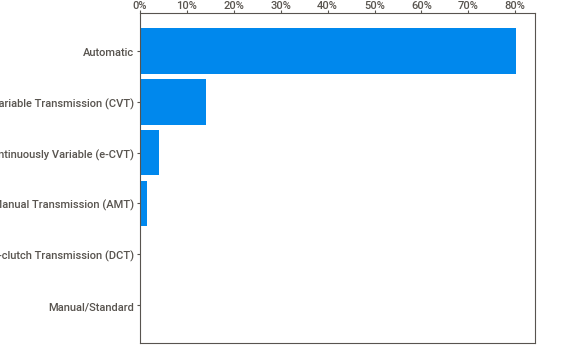
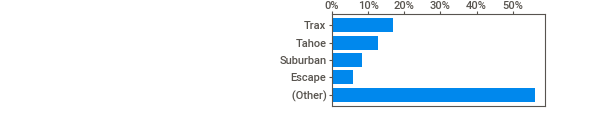
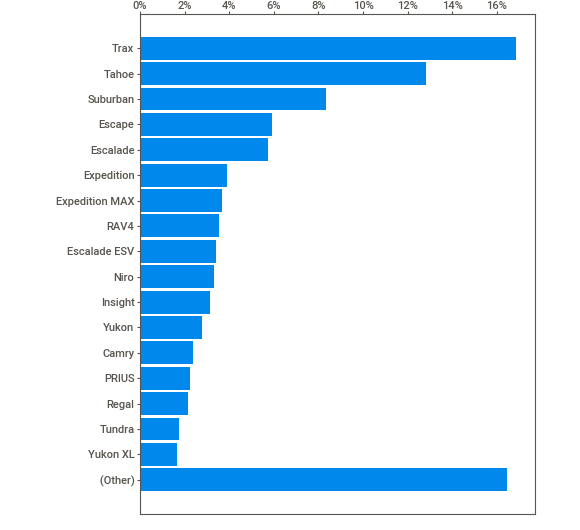
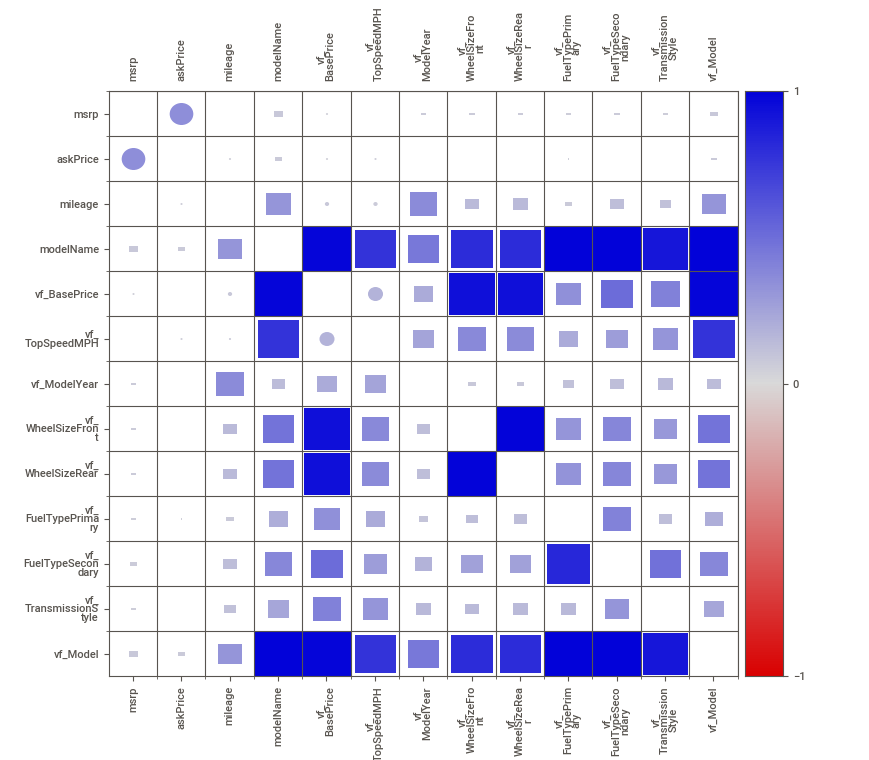
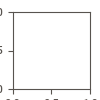

In [25]:
#The IPython library has been added.

IPython.display.HTML('analyze.html')

#To display and save sweetviz visualisation as html file.

In [ ]:
#The Deduction show
#This is an imortant step in Exploratory data analysis,
#this step can retrieve the most innovative and intriguing deductions to make data-driven decisions.

In [ ]:
#Mileage vs Transmission Style

In [51]:
df_mileVsTransmissionStyle = df_all_interesting.select('mileage','vf_TransmissionStyle')

In [52]:
df_mileVsTransmissionStyle = df_mileVsTransmissionStyle.dropna(how='any')

In [55]:
df_mileVsTransmissionStyle = df_mileVsTransmissionStyle.filter(df_mileVsTransmissionStyle.vf_TransmissionStyle!= 'Not Applicable')

In [56]:
df_mileVsTransmissionStyle.count()

1924068

In [57]:
pandas_df_MT = df_mileVsTransmissionStyle.toPandas()

In [58]:
#replacing mileage column with mean  and zero value of mileages with means and transmission style with most frequent style
# mean_value = pandas_df_MT['mileage'].mean()
# pandas_df_MT['mileage'].fillna(value = mean_value, inplace = True)
# pandas_df_MT = pandas_df_MT.fillna(pandas_df_MT['vf_TransmissionStyle'].value_counts().index[1])
# pandas_df_MT.replace({'mileage': {0 : mean_value}})

Text(0.5, 1.0, 'mileage v/s Transmission graph')

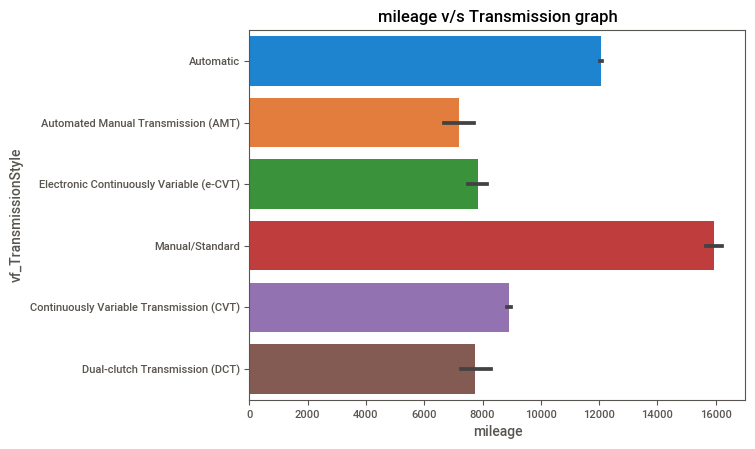

In [59]:
model_transmission = sns.barplot(x='mileage', y='vf_TransmissionStyle', data=pandas_df_MT)

#Graph title
plt.title('mileage v/s Transmission graph')

#save the image in png format 
#plt.savefig("model_transmission.png")


When compared to the other transmission systems, manual transmission has the most mileage among the three most modern transmission systems.
Manual transmissions include more gears and a simpler design, making the transmission system lighter.A simpler method minimizes the annual fuel consumption of the vehicle and, as a consequence, the cost of maintenance.

In [ ]:
#Fuel-type vs Mileage

In [61]:
df_mileVsFuelType = df_all_interesting.select('mileage','vf_FuelTypePrimary')

In [62]:
df_mileVsFuelType = df_mileVsFuelType.dropna(how='any')

In [72]:
df_mileVsFuelType = df_mileVsFuelType.filter(df_mileVsFuelType.vf_FuelTypePrimary!= 'Not Applicable')

In [63]:
df_mileVsFuelType.count()

5528582

In [73]:
pandas_df_MFT = df_mileVsFuelType.toPandas()

Text(0.5, 1.0, 'mileage v/s FuelType graph')

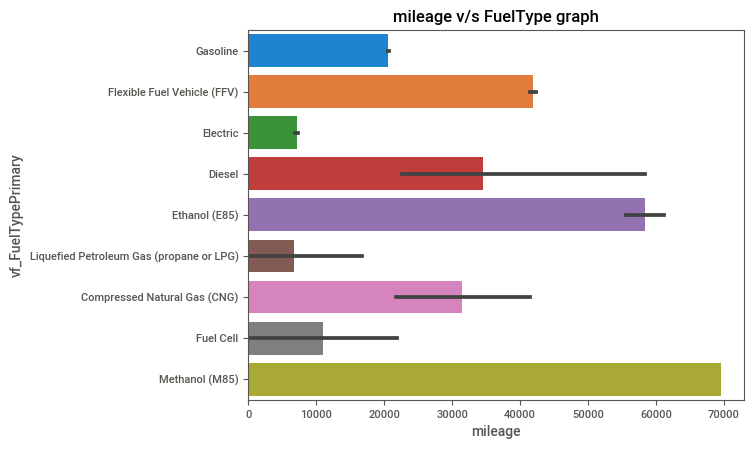

In [74]:
model_fuel = sns.barplot(x='mileage', y='vf_FuelTypePrimary', data=pandas_df_MFT)

#Graph title
plt.title('mileage v/s FuelType graph')


Diesel engines are suitable for long-distance travel. Despite having higher efficiency and cheaper prices than gasoline, diesel engines are limited for vehicles that regularly travel, such as trucks, buses, and off-road vehicles. Diesel engines are limited for vehicles that regularly travel, such as trucks, buses, and off-road vehicles, due to higher greenhouse gas emissions.

In [ ]:
#Year vs Price

In [67]:
df_yearVsPrice = df_all_interesting.select('vf_ModelYear','vf_BasePrice')

In [68]:
df_yearVsPrice = df_yearVsPrice.dropna(how='any')

In [69]:
df_yearVsPrice.count()

1856743

In [70]:
pandas_df_YP = df_yearVsPrice.toPandas()

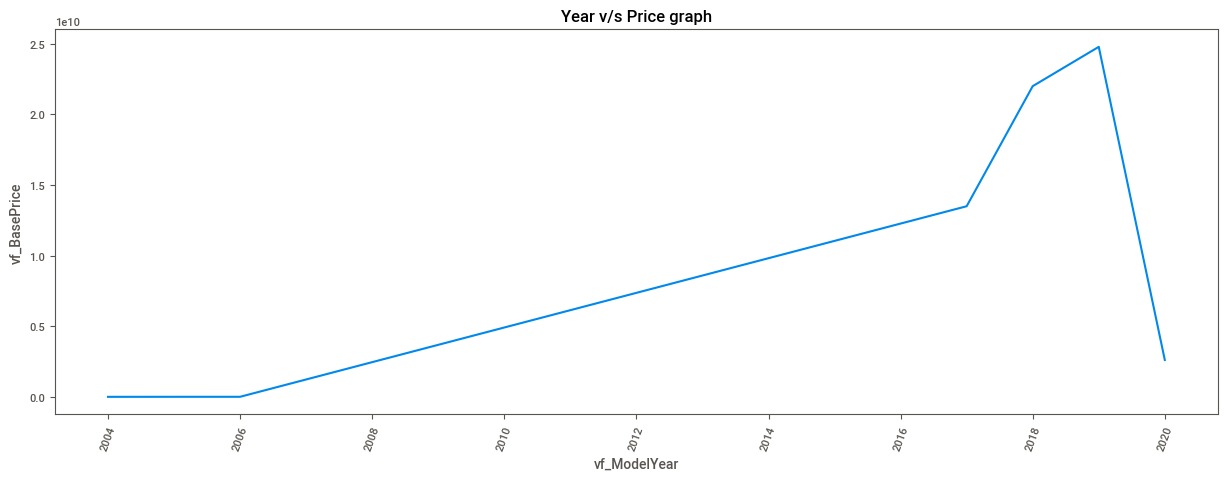

In [77]:
#load the data in group for visual representation of the data
#Take the sum of price attribute of the data
#sort the values from higher to lower
model_price = pandas_df_YP.groupby('vf_ModelYear')['vf_BasePrice'].sum().sort_values()

#load matplotlib and seaborn library to generate visual graphs
plt.figure(figsize=(15,5))
pal = sns.color_palette("Blues", len(model_price))
sns.lineplot(x=model_price.index , y=model_price , palette=pal)

plt.xticks(rotation=70)

#Graph title
plt.title('Year v/s Price graph')


The price graph is drawn in accordance with the trend line y = 1.3 + 2.5x (x 10^8).
The trend line was calculated using the Least Squares Method. This method can be used to predict future prices, give a brief summary of previous sales, and identify growth prospects.
The sales are growing from left to right, and the slope of the trend line is (m) = 2.5, which is positive.
Sales are increasing right to left. Although sales of motor manufacturers were halted due to the pandemic, resulting in a price drop, a price reduction from 2019 to 2020 has a higher impact on corporate profit margins.

In [ ]:
#Model v/s Mileage graph

In [133]:
df_modelVsmileage = df_all_interesting.select('mileage','brandName')

In [134]:
df_modelVsmileage = df_modelVsmileage.dropna(how='any')

In [135]:
df_modelVsmileage.count()

5693755

In [138]:
pandas_df_MM = df_modelVsmileage.toPandas()

Text(0.5, 1.0, 'BrandName v/s Mileage graph')

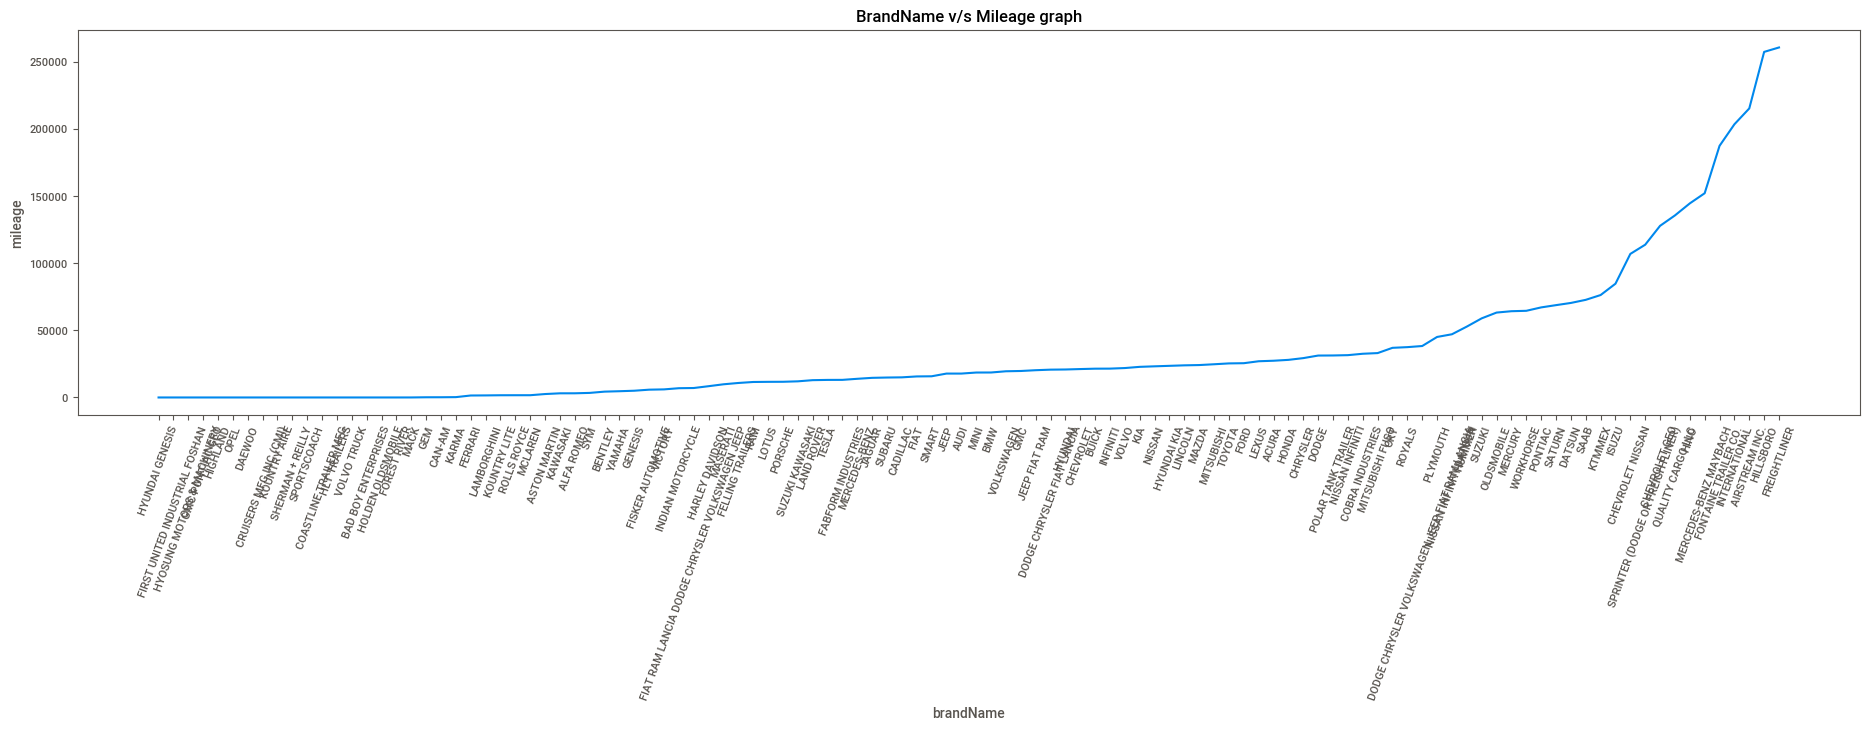

In [141]:
#load the data in group for visual representation of the data
#Take the mean of Mileage (Distance travelled) attribute of the data
#sort the values from higher to lower
model_mileage = pandas_df_MM.groupby('brandName')['mileage'].mean().sort_values()

#load matplotlib and seaborn library to generate visual graphs
plt.figure(figsize=(23,5))
pal = sns.color_palette("Blues", len(model_mileage))
sns.lineplot(x=model_mileage.index , y=model_mileage , palette=pal)

plt.xticks(rotation=70)

#Graph title
plt.title('BrandName v/s Mileage graph')



Text(0.5, 1.0, 'brandname v/s mileage graph')

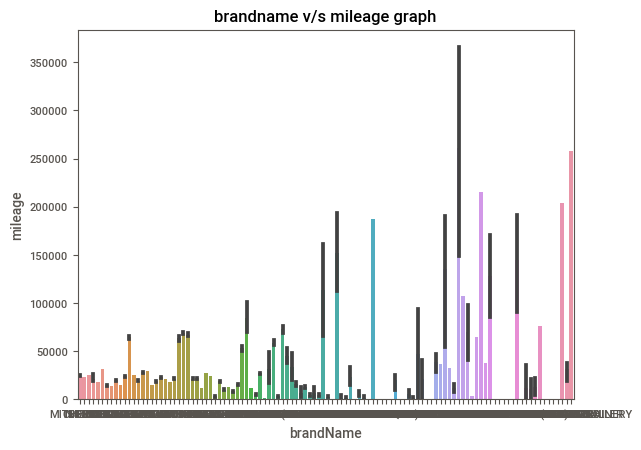

In [143]:
model_brand = sns.barplot(x='brandName', y='mileage', data=pandas_df_MM)

#Graph title
plt.title('brandname v/s mileage graph')


In [147]:
df_1 = df.select('mileage','brandName', 'color', 'vf_BasePrice')

In [157]:
df_1 = df_1.dropna(how='any')

In [158]:
df_1 = df_1.filter(df_1.color!= 'N/A')

In [159]:
df_1.count()

1170657

In [160]:
panda_df1 = df_1.toPandas()

Below is Program for finding prints a dictionary of categorical values and how frequently they appear:

In [161]:
from collections import Counter
def return_counter(data_frame, column_name, limit):
  print(dict(Counter(data_frame[column_name]
  .values).most_common(limit)))

In [171]:
#for example number of card in brandnames
return_counter(panda_df1, 'brandName', 5)

{'FORD': 150072, 'CHEVROLET': 131193, 'JEEP': 124525, 'TOYOTA': 77123, 'HONDA': 76824}


Now, let’s look at the brands of white cars :

In [168]:
df_d1 = panda_df1[panda_df1['color'] =='White']
print(set(df_d1['brandName']))

{'MITSUBISHI', 'FIAT', 'SUBARU', 'GMC', 'LEXUS', 'CHEVROLET', 'HONDA', 'CADILLAC', 'FORD', 'TOYOTA', 'SMART', 'VOLKSWAGEN', 'NISSAN', 'VOLVO', 'LINCOLN', 'LAND ROVER', 'ALFA ROMEO', 'ACURA', 'DODGE', 'JAGUAR', 'ROLLS ROYCE', 'BMW', 'JEEP', 'TESLA', 'RAM', 'HYUNDAI', 'BUICK', 'MINI', 'MASERATI', 'AUDI', 'INFINITI', 'MERCEDES-BENZ', 'KIA', 'BENTLEY', 'CHRYSLER', 'MAZDA', 'PORSCHE'}


In [172]:
print(dict(Counter(df_d1['brandName']).most_common(5)))

{'FORD': 5650, 'JEEP': 3379, 'VOLKSWAGEN': 2458, 'HONDA': 2397, 'CHEVROLET': 1878}


We see that most of the white cars are FORD,JEEP,VOLKSWAGEN,HONDA,CHEVROLET

Following that, summary statistics from numerical columns such as 'price' would be useful. Let's construct a function that takes three arguments: a data frame, a categorical column, and a numerical column. The mean and standard deviation of each numerical column are stored in a data frame, which is then sorted descendingly by mean. This is a useful tool if you want to quickly see if different categories have higher or lower mean and/or standard deviation values for a certain numerical column.

In [173]:
def return_statistics(data_frame, categorical_column, numerical_column):
    mean = []
    std = []
    field = []
    for i in set(list(data_frame[categorical_column].values)):
        new_data = data_frame[data_frame[categorical_column] == i]
        field.append(i)
        mean.append(new_data[numerical_column].mean())
        std.append(new_data[numerical_column].std())
    df = pd.DataFrame({'{}'.format(categorical_column): field, 'mean {}'.format(numerical_column): mean, 'std in {}'.format(numerical_column): std})
    df.sort_values('mean {}'.format(numerical_column), inplace = True, ascending = False)
    df.dropna(inplace = True)
    return df

In [176]:
stats = return_statistics(panda_df1, 'brandName', 'vf_BasePrice')
print(stats.head(15))

        brandName  mean vf_BasePrice  std in vf_BasePrice
20    ROLLS ROYCE      320561.290323         22740.218445
33        BENTLEY      274861.463768         88478.494420
28       MASERATI       79869.322917         12341.036686
17        PORSCHE       75610.085152         35687.328507
23          TESLA       74138.364780         14847.314886
14     LAND ROVER       65661.068281         23136.114821
7        CADILLAC       57198.227118         16790.909157
19         JAGUAR       55216.399321         15482.207517
31  MERCEDES-BENZ       54500.230937         22404.925526
29           AUDI       52109.713198         11524.425060
21            BMW       52098.200283         15417.641589
30       INFINITI       50932.604167          9670.421461
15     ALFA ROMEO       50382.388708         12712.186358
12          VOLVO       47911.333031          6742.631966
4           LEXUS       47350.192019         12901.736966


Let's create a function that accepts a data frame and a numerical column as input and outputs a histogram:

In [186]:
def get_histogram(data_frame, numerical_column):
    df_new = data_frame
    df_new[numerical_column].hist(bins=500)
    plt.title('{} histogram'.format(numerical_column))
    plt.show()

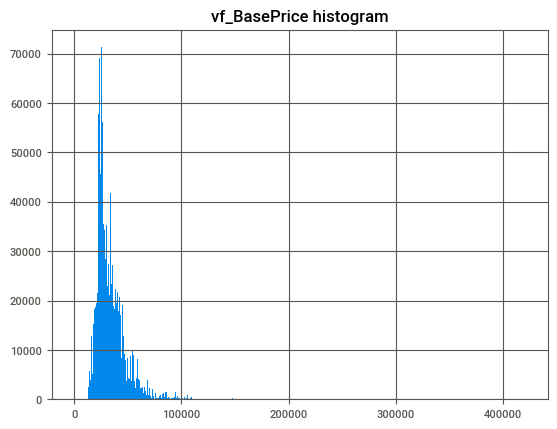

In [187]:
get_histogram(panda_df1, 'vf_BasePrice')

In [190]:
import matplotlib.pyplot as plt
def get_boxplot_of_categories(data_frame, categorical_column, numerical_column, limit):
    import seaborn as sns
    from collections import Counter
    keys = []
    for i in dict(Counter(panda_df1[categorical_column].values).most_common(limit)):
        keys.append(i)
    print(keys)
    df_new = panda_df1[panda_df1[categorical_column].isin(keys)]
    sns.set()
    sns.boxplot(x = df_new[categorical_column], y = df_new[numerical_column])
    plt.show()

['FORD', 'CHEVROLET', 'JEEP', 'TOYOTA', 'HONDA']


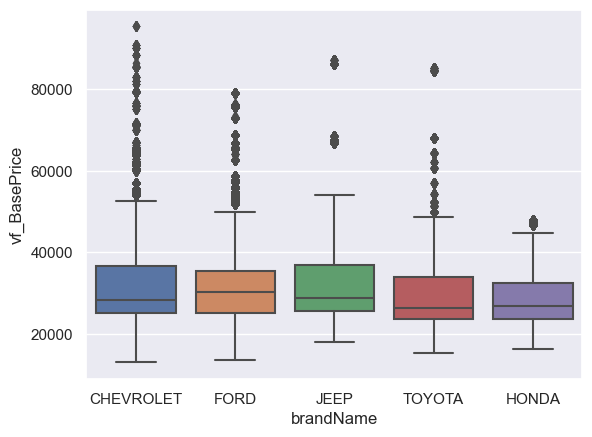

In [191]:
get_boxplot_of_categories(panda_df1, 'brandName', 'vf_BasePrice', 5)

In [ ]:
#Some more columns for cateogorical attributes count 
#selecting all numeric columns for finding correlations
df_all_categories = df.select('firstSeen','lastSeen','msrp','askPrice','mileage','modelName',
                           'vf_BasePrice', 'vf_TopSpeedMPH','vf_ModelYear','vf_WheelSizeFront','vf_WheelSizeRear',
                                'vf_FuelTypePrimary','vf_FuelTypeSecondary','vf_TransmissionStyle', 'vf_Model') 